In [1]:
from mt_rent_statement import *

### Load data

In [2]:
start='2023-05-01'
end='2023-05-31'
dfT=load_tenancies('all_tenancies.xls')
dfAll=load_data(start,end)
dfAll.head(3)

Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\MAY2023_codedAndCategorised.xlsx


E:\dtuklaptop\e\Users\Mat\python\14. property\PropertyAnalytics_v2\mt_rent_statement.py:163: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfAll=pd.concat([dfAll,dfTemp])


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2023-05-01,60-83-71 00558156,-465.0,REPAIRS_AND_MAINTENANCE,Alhambra Road M Tucker SC,NaN,NaN,ServiceCharge,NaN
2023-05-01,60-83-71 00558156,-315.0,REPAIRS_AND_MAINTENANCE,ALHHAMBRA ROAD M Tucker SC,NaN,NaN,ServiceCharge,NaN
2023-05-01,60-83-71 00558156,-320.0,REPAIRS_AND_MAINTENANCE,Alhambra Road M Tucker SC,NaN,NaN,ServiceCharge,NaN


### Rent Statement

In [3]:
paidinadvancelist = ['Peter Gradon (28/02/2018)'] 
inarrearslist = ['Mark Williams (25/09/2019)']
dfRs=get_rent_statement(dfAll, dfT, start, end, inarrearslist, paidinadvancelist)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
dfRs.style.apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net,Status
Property,,,,,,,
321 London Rd,,,0,0,0,0,
Flat 1 - 321 London Rd,Soumya Xaviour (19/12/2022),None,725,0,-427,298,Paid
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,786,0,-409,377,Paid
Flat 3 - 321 London Rd,Charles Prescott (01/10/2022-03/07/2023),None,900,0,-348,552,Paid
Flat 4 - 321 London Rd,Chloe Freshney & Harry Aldingtons (31/01/2023),None,725,0,-427,298,Paid
169 Fawcett Rd,,,0,-15,0,-15,
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,1426,0,-385,1041,Paid
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,600,-66,-346,188,Paid
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,675,0,-411,264,Paid


This month:

- rate 4.25%

Notes:
- Valverde evicted 26/01/23, Radzevics 13/12/22, Hinks 10/02/23, Austin 03/04/23
- Mark Williams didn't pay Oct
- Graddon paid 6 months advance in Sept to March - Gradon was served S13 rent increase and paid the difference in Jan 23
- Ivana to check rent increases for:
    - Parkinson
    - Pedace
    - Passmore
    - Henson
- F1 171 rent raised to £875 on 06/03/23
- Plan to give S13 to Henson on 01/03/23
- ** Need to refund Fratton roof payment in Jan


### Income/Expenditure per Property

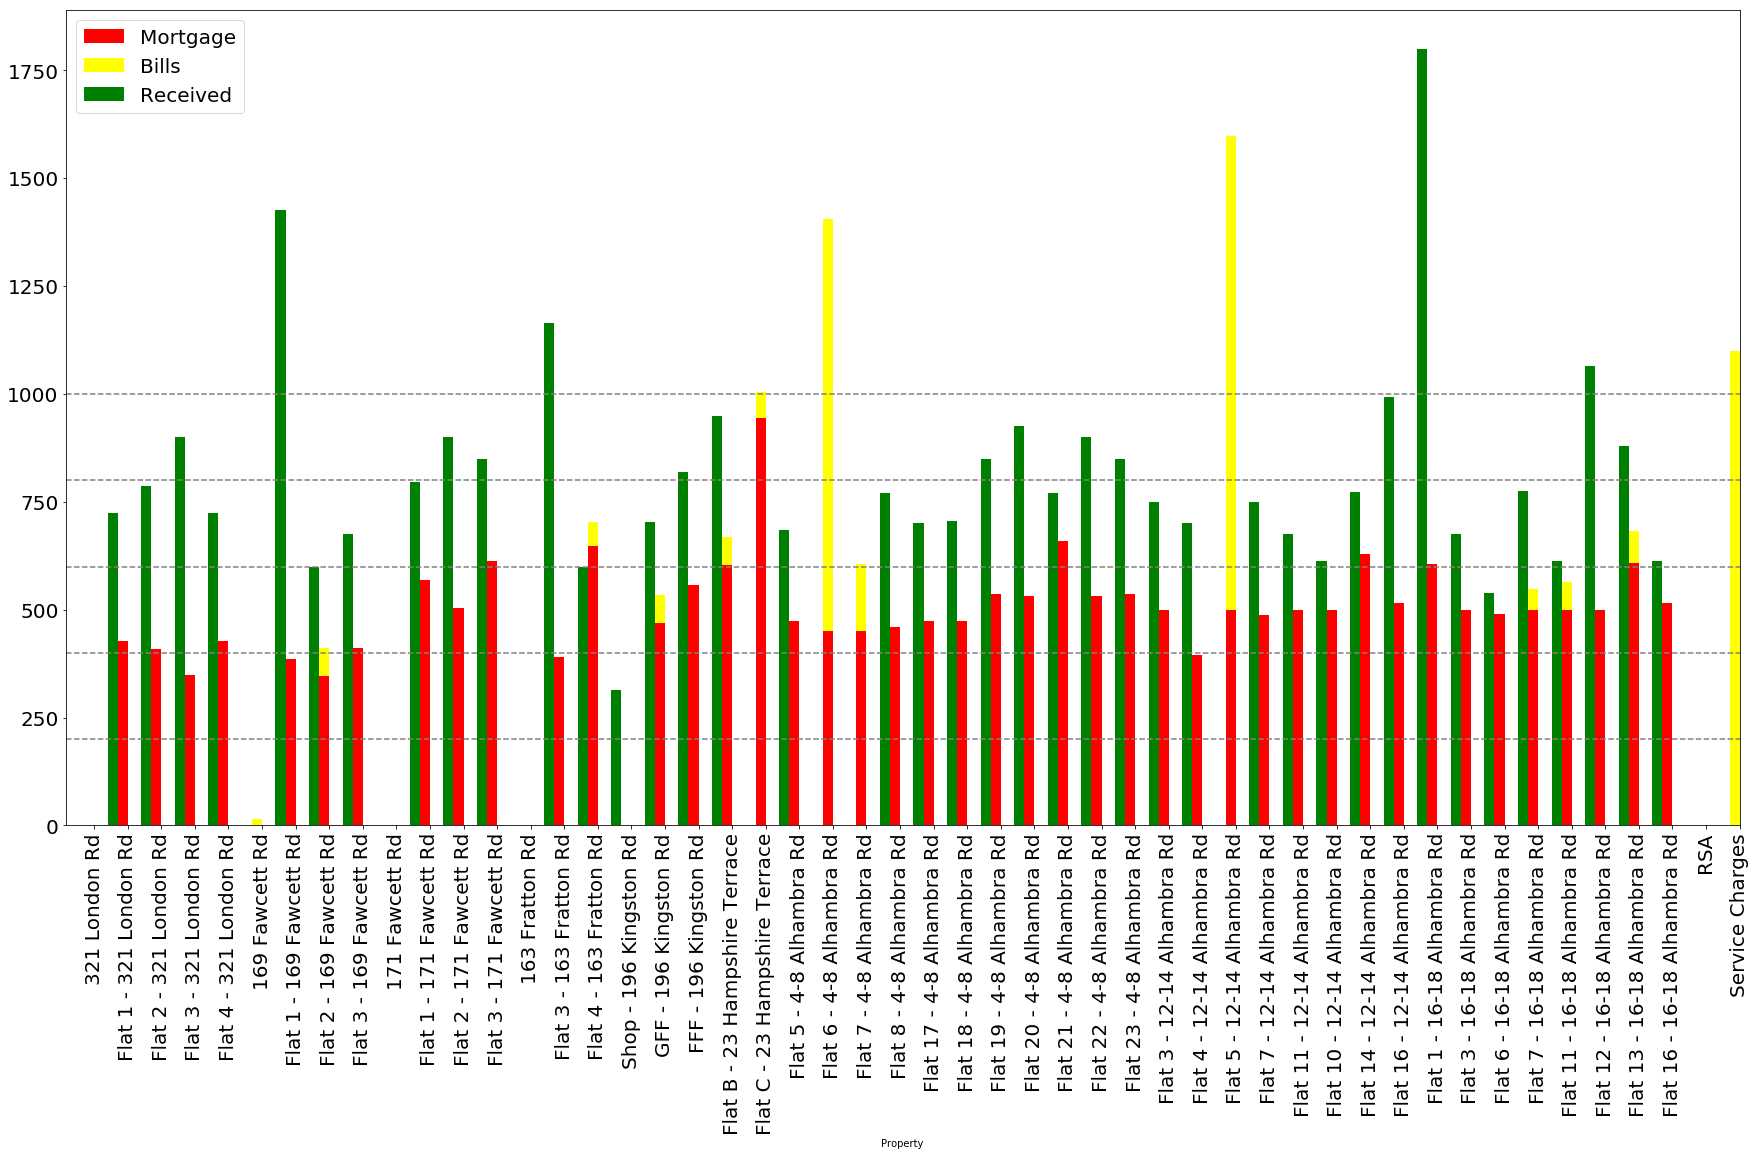

In [4]:
plot_income_expenditure_per_property(dfRs[:-1])

### Net Income Per Property

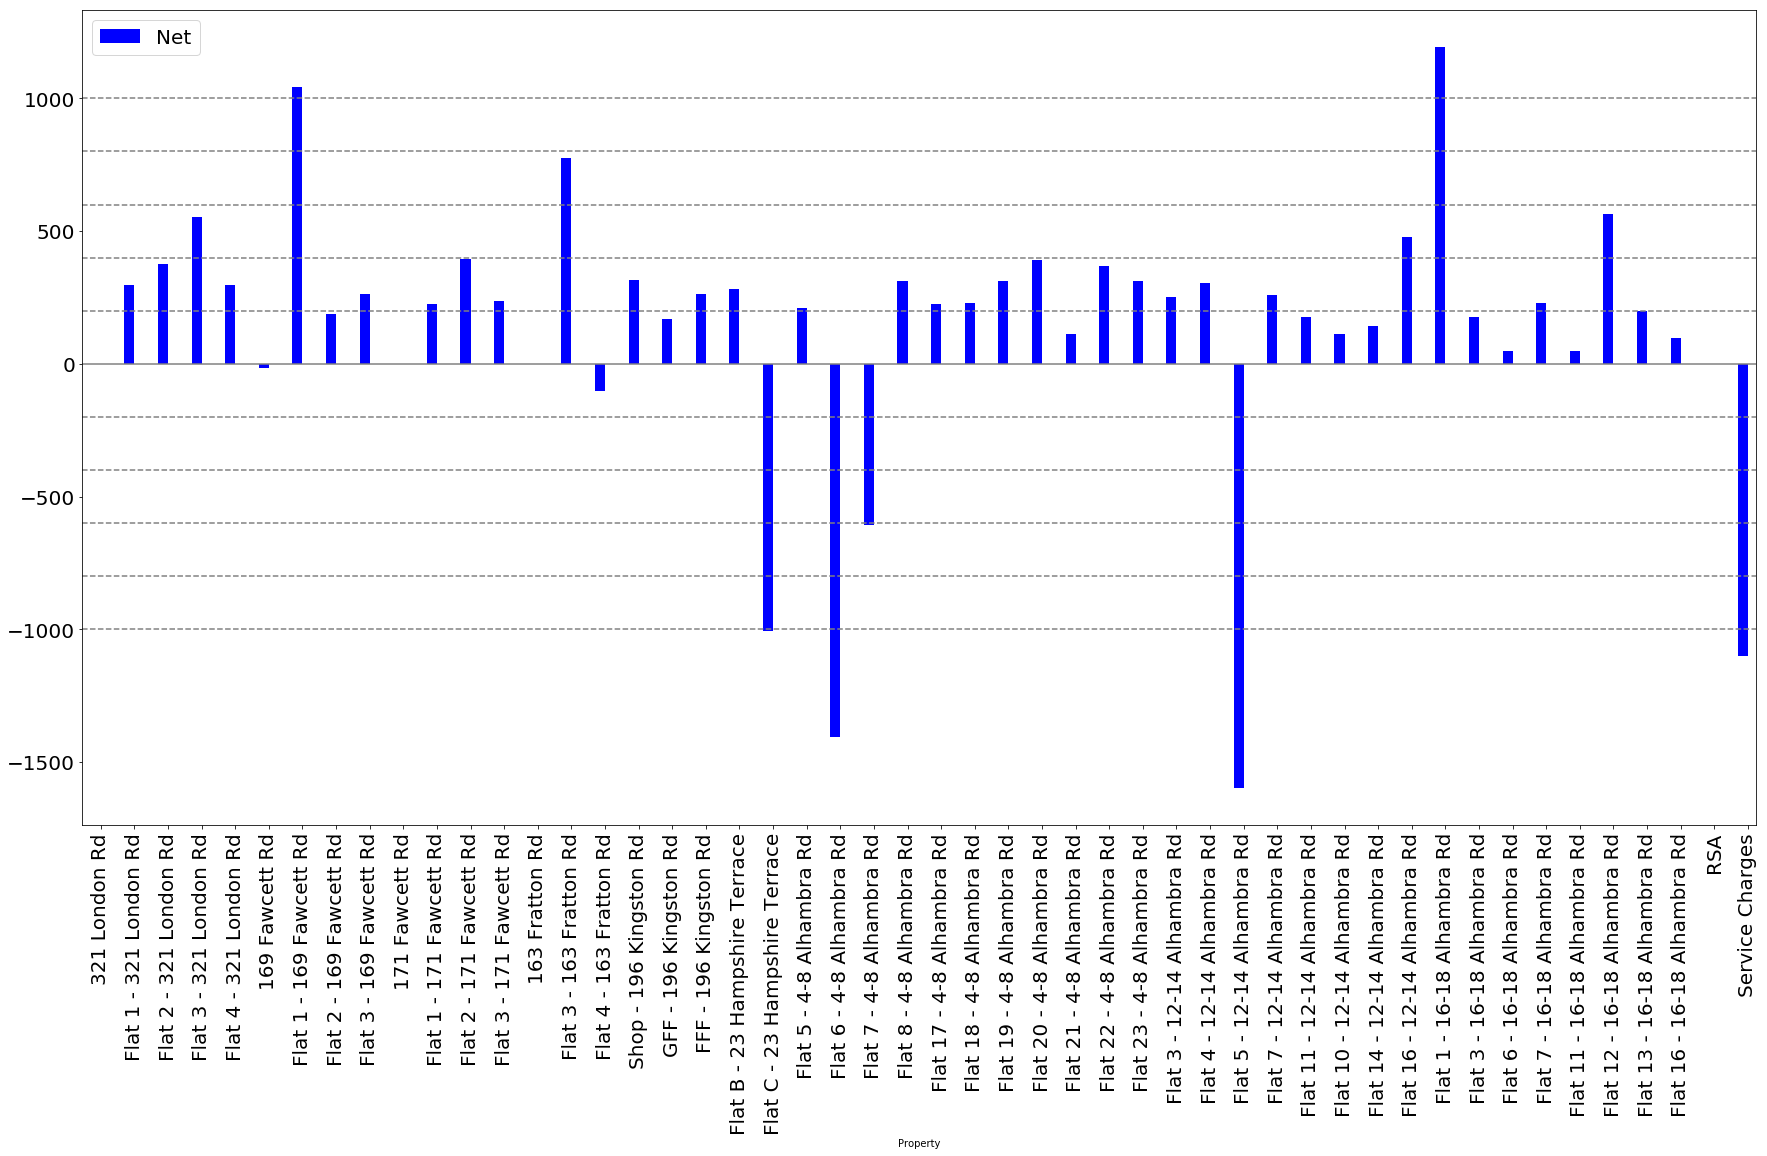

In [5]:
plot_net_income(dfRs[:-1])

### Accounts Check
Check Drawings against expenses

In [6]:
dfAll[(dfAll.Cat=='RegularPayment')|(dfAll.Cat=='PersonalExpense')|(dfAll.Cat=='Hilltop')|(dfAll.Cat=='HMRCDD')|(dfAll.Cat=='Drawings')|(dfAll.Cat=='SchoolFee')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
Drawings,-501.00,0.0
HMRCDD,-300.00,0.0
Hilltop,-300.00,0.0
PersonalExpense,-2761.78,0.0
RegularPayment,-980.93,0.0
SchoolFee,-5677.52,0.0


In [7]:
dfAll.groupby(['Account','Cat']).sum().style.apply(custom_style_accounts_cat, axis=1)

#### Mortgage check
Check mortgages refunded from business account

In [8]:
dfMtg=dfAll[((dfAll.Cat=='Mortgage')|(dfAll.Cat=='MortgageRefund'))&(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).Amount.sum()
dfMtg=dfMtg.reset_index().pivot('Account','Cat')
dfMtg.columns=dfMtg.columns.get_level_values(1)
if('MortgageRefund' not in dfMtg.columns):
    dfMtg['MortgageRefund']=0
dfMtg['Diff']=dfMtg.Mortgage + dfMtg.MortgageRefund
dfMtg

Cat,Mortgage,MortgageRefund,Diff
Account,,,
20-53-97 30728691,-21867.84,0,-21867.84


In [9]:
dfMtg['Diff'].sum()

-21867.839999999997

#### Rent check
Rents going to wrong account

In [10]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2023-05-02,20-74-09 60458872,600.0,Funds Transfer,NATSO P RENT FT,F4163FRA,NaN,OurRent,NaN


In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
OurRent,600.0,0.0


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [12]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2023-05-26,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN


In [13]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
PropertyExpense,-15.0,0.0


In [14]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat


In [15]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
